# Title: Web Scraping and Exploratory data analysis on IMDB Rating of top 1000 movies.

# Importing the required libraries

In [ ]:
#These are for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#these are for Web Scraping
import bs4
import requests
from bs4 import BeautifulSoup
from csv import writer

## DATASETS :
* Dataset name              :IMDb "Top 1000" movies (Sorted by IMDb Rating Descending)
* Link                      : https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating

* dataset link              :https://github.com/sengourav/Android-and-other-codes./blob/62cb5841e085e894fff5a72c0e8ba9fe264c8b88/FeaturedMoviesReleased2021.csv
 or
https://github.com/sengourav/Android-and-other-codes./blob/62cb5841e085e894fff5a72c0e8ba9fe264c8b88/cleaned1000movies.csv
* Number of observation     : 1000
* Number of variables       : 9  
* Description of the dataset:There are total 1000 movies. Each movie in the dataset comes with following attributes:
                              Name
                              Rank
                              Description
                              Director name
                              Actors name
                              IMDB Rating
                              Gross Income
                              Metadata
                              Votes
                             

# Web Scraping of above dataset using Beautiful Soup

In [ ]:
url = "https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating"
r = requests.get(url)
htmlcontent = r.content
soup = BeautifulSoup(htmlcontent,'html.parser')

In [ ]:
list_movies =soup.find('div',class_="lister-list")
movies = list_movies.find_all('div',class_="lister-item mode-advanced")

In [ ]:

with open('FeaturedMoviesReleased2021.csv','a',newline='') as f:
    the_writer = writer(f)
    header = ['Rank','Title','Year','Description','Director','Actor','IMDB Rating','Genre','Runtime','Metadata','Gross Earning','Vote']
    the_writer.writerow(header)
    for movie in movies:
        name =movie.find('h3',class_="lister-item-header").a.text
        rank =movie.find('span',class_="lister-item-index unbold text-primary").get_text(strip=True).split('.')[0] # text of the 'td' tag
        year =movie.find('span',class_="lister-item-year text-muted unbold").text
        runtime=movie.find('span',class_="runtime").text
        genre = movie.find('span',class_="genre").text
        rating=movie.find('div',class_="ratings-bar").strong.text
        meta=movie.find('div',class_="inline-block ratings-metascore")
        if meta is None:
            metadata = None
        else:
            metadata=meta.span.text

        vote =movie.find('p',class_="sort-num_votes-visible").find_all('span')[1].text
        earning =movie.find('p',class_="sort-num_votes-visible").find_all('span')
        if len(earning)<5:
            gross_earning = None
        else:
            gross_earning=earning[4].text.strip('\n')
        discription =movie.find('div',class_="lister-item-content").find_all('p')[1].text
        director=movie.find('div',class_="lister-item-content").find_all('p')[2].find_all('a')[0].text
        actors=movie.find('div',class_="lister-item-content").find_all('p')[2].find_all('a')
        actors_name=''
        for i in actors:
            if actors_name=='':
                actors_name=actors_name+i.text
            else:
                actors_name =actors_name+','+i.text
        info =[rank,name,year,discription,director,actors_name,rating,genre,runtime,metadata,gross_earning,vote]
        the_writer.writerow(info)

## Viewing the data:

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("FeaturedMoviesReleased2021.csv",encoding='latin-1',index_col=0)

In [ ]:
# Top five rows of the dataset
data.head()

,Title,Year,Description,Director,Actor,IMDB Rating,Genre,Runtime,Metadata,Gross Earning,Vote
Rank,,,,,,,,,,,
1,The Shawshank Redemption,(1994),\nTwo imprisoned men bond over a number of yea...,Frank Darabont,"Frank Darabont,Tim Robbins,Morgan Freeman,Bob ...",9.3,\nDrama,142 min,81,$28.34M,"2,648,769"
2,The Godfather,(1972),\nThe aging patriarch of an organized crime dy...,Francis Ford Coppola,"Francis Ford Coppola,Marlon Brando,Al Pacino,J...",9.2,"\nCrime, Drama",175 min,100,$134.97M,"1,836,081"
3,The Dark Knight,(2008),\nWhen the menace known as the Joker wreaks ha...,Christopher Nolan,"Christopher Nolan,Christian Bale,Heath Ledger,...",9.0,"\nAction, Crime, Drama",152 min,84,$534.86M,"2,620,732"
4,The Lord of the Rings: The Return of the King,(2003),\nGandalf and Aragorn lead the World of Men ag...,Peter Jackson,"Peter Jackson,Elijah Wood,Viggo Mortensen,Ian ...",9.0,"\nAction, Adventure, Drama",201 min,94,$377.85M,"1,824,571"
5,Schindler's List,(1993),\nIn German-occupied Poland during World War I...,Steven Spielberg,"Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben...",9.0,"\nBiography, Drama, History",195 min,94,$96.90M,"1,342,423"


In [ ]:
# viewing bottom five rows
data.tail()

,Title,Year,Description,Director,Actor,IMDB Rating,Genre,Runtime,Metadata,Gross Earning,Vote
Rank,,,,,,,,,,,
996,Sabrina,(1954),\nA playboy becomes interested in the daughter...,Billy Wilder,"Billy Wilder,Humphrey Bogart,Audrey Hepburn,Wi...",7.6,"\nComedy, Drama, Romance",113 min,72,NaN,"65,373"
997,From Here to Eternity,(1953),"\nAt a U.S. Army base in 1941 Hawaii, a privat...",Fred Zinnemann,"Fred Zinnemann,Burt Lancaster,Montgomery Clift...",7.6,"\nDrama, Romance, War",118 min,85,$30.50M,"47,276"
998,Snow White and the Seven Dwarfs,(1937),\nExiled into the dangerous forest by her wick...,William Cottrell,"William Cottrell,David Hand,Wilfred Jackson,La...",7.6,"\nAnimation, Adventure, Family",83 min,95,$184.93M,"199,317"
999,The 39 Steps,(1935),\nA man in London tries to help a counter-espi...,Alfred Hitchcock,"Alfred Hitchcock,Robert Donat,Madeleine Carrol...",7.6,"\nCrime, Mystery, Thriller",86 min,93,NaN,"57,281"
"1,000",The Invisible Man,(1933),\nA scientist finds a way of becoming invisibl...,James Whale,"James Whale,Claude Rains,Gloria Stuart,William...",7.6,"\nHorror, Sci-Fi",71 min,87,NaN,"35,376"


Clearly this data is not suitable for analysis purpose. For example Votes contain commas in between them which cannot be handled 
during analysis.Thus we need to clean the data first.

## Data Cleaning:

In [ ]:
data['Vote'] =[vote.replace(',','')for vote in data['Vote']]
data['Year']= [year.replace('(','').replace(')','').strip('I').strip('II').strip(' ') for year in data['Year']]
data['Description'] =[description.replace('\n','') for description in data['Description']]
data['Genre'] =[genre.replace('\n','') for genre in data['Genre']]
data['Runtime'] =[runtime.replace('min','') for runtime in data['Runtime']]

In [ ]:
list =[]
for item in data['Gross Earning']:
    if type(item) is str:
        item=item.strip('\n').strip('$').strip('M').strip('#')
        list.append(item)
    else:
        list.append(item)
        
data['Gross Earning'] = list
data.head(15)

,Title,Year,Description,Director,Actor,IMDB Rating,Genre,Runtime,Metadata,Gross Earning,Vote
Rank,,,,,,,,,,,
1,The Shawshank Redemption,1994,Two imprisoned men bond over a number of years...,Frank Darabont,"Frank Darabont,Tim Robbins,Morgan Freeman,Bob ...",9.3,Drama,142,81,28.34,2648769
2,The Godfather,1972,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"Francis Ford Coppola,Marlon Brando,Al Pacino,J...",9.2,"Crime, Drama",175,100,134.97,1836081
3,The Dark Knight,2008,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christopher Nolan,Christian Bale,Heath Ledger,...",9.0,"Action, Crime, Drama",152,84,534.86,2620732
4,The Lord of the Rings: The Return of the King,2003,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"Peter Jackson,Elijah Wood,Viggo Mortensen,Ian ...",9.0,"Action, Adventure, Drama",201,94,377.85,1824571
5,Schindler's List,1993,"In German-occupied Poland during World War II,...",Steven Spielberg,"Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben...",9.0,"Biography, Drama, History",195,94,96.90,1342423
6,The Godfather Part II,1974,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"Francis Ford Coppola,Al Pacino,Robert De Niro,...",9.0,"Crime, Drama",202,90,57.30,1258236
7,12 Angry Men,1957,The jury in a New York City murder trial is fr...,Sidney Lumet,"Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Ba...",9.0,"Crime, Drama",96,96,4.36,782059
8,Rocketry: The Nambi Effect,2022,Based on the life of Indian Space Research Org...,Madhavan,"Madhavan,Madhavan,Simran,Rajit Kapoor,Ravi Rag...",8.9,"Biography, Drama",157,NaN,NaN,46731
9,Jai Bhim,2021,When a tribal man is arrested for a case of al...,T.J. Gnanavel,"T.J. Gnanavel,Suriya,Lijo Mol Jose,Manikandan ...",8.9,"Crime, Drama, Mystery",164,NaN,231,199053


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1009 entries, 1 to 1,000
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          1009 non-null   object
 1   Year           1009 non-null   object
 2   Description    1009 non-null   object
 3   Director       1009 non-null   object
 4   Actor          1009 non-null   object
 5   IMDB Rating    1009 non-null   object
 6   Genre          1009 non-null   object
 7   Runtime        1009 non-null   object
 8   Metadata       848 non-null    object
 9   Gross Earning  856 non-null    object
 10  Vote           1009 non-null   object
dtypes: object(11)
memory usage: 94.6+ KB


# Size

In [ ]:
data.shape

(1009, 11)

clearly there are some duplicate rows.Lets remove them and save the cleaned data in new file.

# Removing Duplicate data

In [ ]:
data[data.duplicated(subset = None, keep ='first')]

,Title,Year,Description,Director,Actor,IMDB Rating,Genre,Runtime,Metadata,Gross Earning,Vote
Rank,,,,,,,,,,,
Rank,Title,Year,Description,Director,Actor,IMDB Rating,Genre,Runtime,Metadata,Gross Earning,Vote
Rank,Title,Year,Description,Director,Actor,IMDB Rating,Genre,Runtime,Metadata,Gross Earning,Vote
Rank,Title,Year,Description,Director,Actor,IMDB Rating,Genre,Runtime,Metadata,Gross Earning,Vote
Rank,Title,Year,Description,Director,Actor,IMDB Rating,Genre,Runtime,Metadata,Gross Earning,Vote
Rank,Title,Year,Description,Director,Actor,IMDB Rating,Genre,Runtime,Metadata,Gross Earning,Vote
Rank,Title,Year,Description,Director,Actor,IMDB Rating,Genre,Runtime,Metadata,Gross Earning,Vote
Rank,Title,Year,Description,Director,Actor,IMDB Rating,Genre,Runtime,Metadata,Gross Earning,Vote
Rank,Title,Year,Description,Director,Actor,IMDB Rating,Genre,Runtime,Metadata,Gross Earning,Vote


In [ ]:
df=data.drop_duplicates(keep=False)

In [ ]:
df.to_csv('cleaned1000movies.csv')

In [ ]:
cleaned_data =pd.read_csv('cleaned1000movies.csv',index_col=0)

In [ ]:
cleaned_data.shape

(1000, 11)

In [ ]:
print("Number of rows :",cleaned_data.shape[0])
print("Number of columns:" , cleaned_data.shape[1])

Number of rows : 1000
Number of columns: 11


# Info of Data

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1,000
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          1000 non-null   object 
 1   Year           1000 non-null   int64  
 2   Description    1000 non-null   object 
 3   Director       1000 non-null   object 
 4   Actor          1000 non-null   object 
 5   IMDB Rating    1000 non-null   float64
 6   Genre          1000 non-null   object 
 7   Runtime        1000 non-null   int64  
 8   Metadata       839 non-null    float64
 9   Gross Earning  847 non-null    float64
 10  Vote           1000 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


Result:
* Number of entries are 1000 indexing from 1 to 1000
* Number of columns are 11.
* Clearly there are some null values in the column 'Gross Earning' and 'Metadata'.
* We have 3 column with float datatype , 5 column with object datatype and 3 column with integer datatype.


## Missing values:

In [ ]:
cleaned_data.isnull()

,Title,Year,Description,Director,Actor,IMDB Rating,Genre,Runtime,Metadata,Gross Earning,Vote
Rank,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
996,False,False,False,False,False,False,False,False,False,True,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#cloumns with missing values
df.columns[df.isnull().any(axis=0)]

Index(['Metadata', 'Gross Earning'], dtype='object')

In [ ]:
cleaned_data.isnull().sum()

Title              0
Year               0
Description        0
Director           0
Actor              0
IMDB Rating        0
Genre              0
Runtime            0
Metadata         161
Gross Earning    153
Vote               0
dtype: int64

There are 161 missing values in Metadata column and 153 missing values in Gross Earning column

In [ ]:
# number of rows with atleast one missing values
null_rows = cleaned_data.isnull().any(axis=1)
df[null_rows].shape

(240, 11)

In [ ]:
#percentage of missing values by columns
cleaned_data.isnull().sum()*100/len(cleaned_data)

Title             0.0
Year              0.0
Description       0.0
Director          0.0
Actor             0.0
IMDB Rating       0.0
Genre             0.0
Runtime           0.0
Metadata         16.1
Gross Earning    15.3
Vote              0.0
dtype: float64

# Droping rows having missing values:

In [ ]:
cleaned_data.dropna(axis=0)

,Title,Year,Description,Director,Actor,IMDB Rating,Genre,Runtime,Metadata,Gross Earning,Vote
Rank,,,,,,,,,,,
1,The Shawshank Redemption,1994,Two imprisoned men bond over a number of years...,Frank Darabont,"Frank Darabont,Tim Robbins,Morgan Freeman,Bob ...",9.3,Drama,142,81.0,28.34,2648769
2,The Godfather,1972,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"Francis Ford Coppola,Marlon Brando,Al Pacino,J...",9.2,"Crime, Drama",175,100.0,134.97,1836081
3,The Dark Knight,2008,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christopher Nolan,Christian Bale,Heath Ledger,...",9.0,"Action, Crime, Drama",152,84.0,534.86,2620732
4,The Lord of the Rings: The Return of the King,2003,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"Peter Jackson,Elijah Wood,Viggo Mortensen,Ian ...",9.0,"Action, Adventure, Drama",201,94.0,377.85,1824571
5,Schindler's List,1993,"In German-occupied Poland during World War II,...",Steven Spielberg,"Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben...",9.0,"Biography, Drama, History",195,94.0,96.90,1342423
...,...,...,...,...,...,...,...,...,...,...,...
991,The Jungle Book,1967,Bagheera the Panther and Baloo the Bear have a...,Wolfgang Reitherman,"Wolfgang Reitherman,Phil Harris,Sebastian Cabo...",7.6,"Animation, Adventure, Comedy",78,65.0,141.84,182886
993,The Birds,1963,A wealthy San Francisco socialite pursues a po...,Alfred Hitchcock,"Alfred Hitchcock,Rod Taylor,Tippi Hedren,Jessi...",7.6,"Drama, Horror, Mystery",119,90.0,11.40,189075
994,Les yeux sans visage,1960,A surgeon causes an accident which leaves his ...,Georges Franju,"Georges Franju,Pierre Brasseur,Alida Valli,Jul...",7.6,"Drama, Horror",90,90.0,0.05,31852


# Describe the data:

In [ ]:
cleaned_data.describe()

,Year,IMDB Rating,Runtime,Metadata,Gross Earning,Vote
count,1000.000000,1000.000000,1000.000000,839.000000,847.000000,1.000000e+03
mean,1991.305000,7.965200,123.828000,78.761621,73.097804,3.057101e+05
std,23.980722,0.277247,28.660004,12.014824,113.686385,3.677583e+05
min,1920.000000,7.600000,45.000000,28.000000,0.000000,2.550100e+04
25%,1975.000000,7.700000,103.000000,71.000000,3.425000,5.898625e+04
50%,1999.000000,7.900000,120.000000,80.000000,26.020000,1.526670e+05
75%,2010.000000,8.100000,138.000000,88.000000,99.240000,4.212710e+05
max,2022.000000,9.300000,321.000000,100.000000,936.660000,2.648769e+06


In [ ]:
cleaned_data['Genre'].describe()

count                  1000
unique                  198
top       Drama            
freq                     86
Name: Genre, dtype: object

Clearly there are 198 unique values in Genre where top one is Drama having frequency of 86.

In [ ]:
cleaned_data['Genre'].value_counts().head()

Drama                                 86
Drama, Romance                        35
Comedy, Drama                         34
Comedy, Drama, Romance                33
Action, Crime, Drama                  31
Name: Genre, dtype: int64

In [ ]:
cleaned_data['Director'].describe()

count                 1000
unique                 553
top       Alfred Hitchcock
freq                    13
Name: Director, dtype: object

This tells us that there are total 553 unique directors in this dataset. Alfred Hitchcock directed total of 13 movies which is highest among 553 directors.

# Questions :

# Which movies has runtime >=180 minutes?

In [ ]:
cleaned_data[cleaned_data['Runtime']>=180]['Title']

Rank
4      The Lord of the Rings: The Return of the King
5                                   Schindler's List
6                              The Godfather Part II
26                                    The Green Mile
33                              Shichinin no samurai
67                                 Avengers: Endgame
118                      Once Upon a Time in America
125                               Lawrence of Arabia
148                               Bhaag Milkha Bhaag
150                               Gangs of Wasseypur
159                          The Wolf of Wall Street
166                           Swades: We, the People
205                               Gone with the Wind
225                                       Kis Uykusu
260                                   Dil Chahta Hai
267                Lagaan: Once Upon a Time in India
291                                           Gandhi
292                              Fanny och Alexander
296                                  The 

In [ ]:
len(cleaned_data[cleaned_data['Runtime']>=180])

46

There are 46 movies with runtime greater than 180 minutes 

# Which year has highest average voting?

In [ ]:
cleaned_data.groupby('Year')['Vote'].mean().sort_values(ascending =False)


Year
1994    746697.615385
1977    606662.666667
1999    589147.647059
2008    525139.950000
2010    517540.809524
            ...      
1935     46255.333333
1928     44400.500000
1947     42682.000000
1932     37425.000000
1945     32668.250000
Name: Vote, Length: 101, dtype: float64

In the year 1994 there was highest average voting.

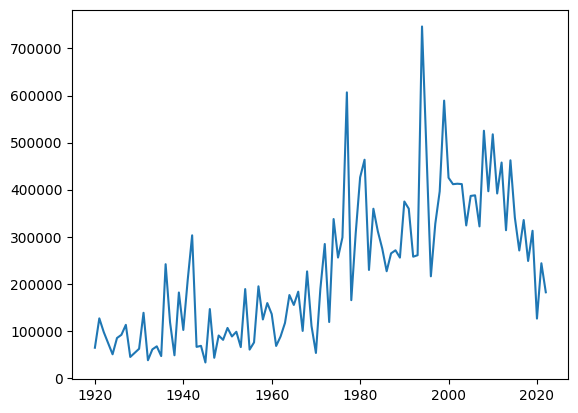

In [ ]:
x=cleaned_data.groupby('Year')['Vote'].mean()
plt.plot(x);

# Visualizing Votes of last 10 years

In [ ]:
x=cleaned_data[((cleaned_data['Year'] >= 2012) & (cleaned_data['Year'] <= 2022))]

Text(0.5, 1.0, 'Votes by Year')

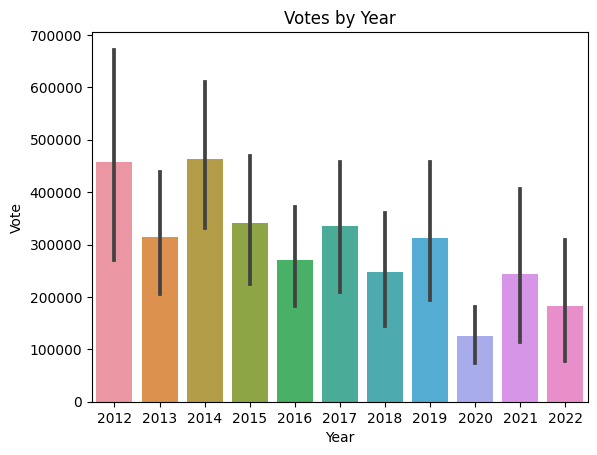

In [ ]:
sns.barplot(x='Year',y='Vote',data =x)
plt.title("Votes by Year")

# Does Average rating follows trend across the years?

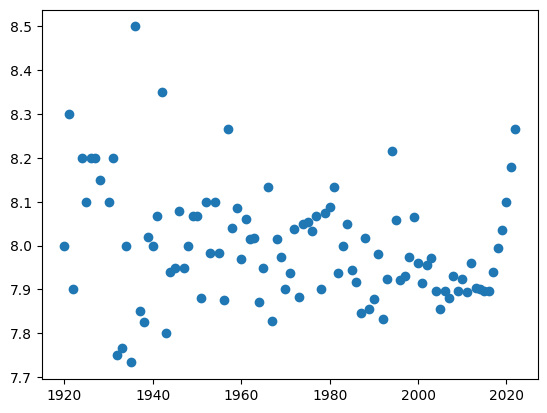

In [ ]:
x=cleaned_data.groupby('Year')['IMDB Rating'].mean().reset_index()
x
plt.scatter(x['Year'],x['IMDB Rating']);

From 1920 to 2020 the average rating has fallen. Thus the users do not seems to be satisfied with the movies  now a days.

# Which Year has highest average Revenue?

In [ ]:
cleaned_data.groupby('Year')['Gross Earning'].mean().sort_values(ascending =False)

Year
2021    381.360000
2018    175.729333
1977    164.676667
1953    142.833333
2022    141.500000
           ...    
1931      0.025000
1928      0.020000
1920           NaN
1922           NaN
1943           NaN
Name: Gross Earning, Length: 101, dtype: float64

So the highset revenue was in the year 2021

# Visualizing Average Revenue for last 10 years

C:\Users\gorav sen\Python\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\gorav sen\Python\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\gorav sen\Python\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


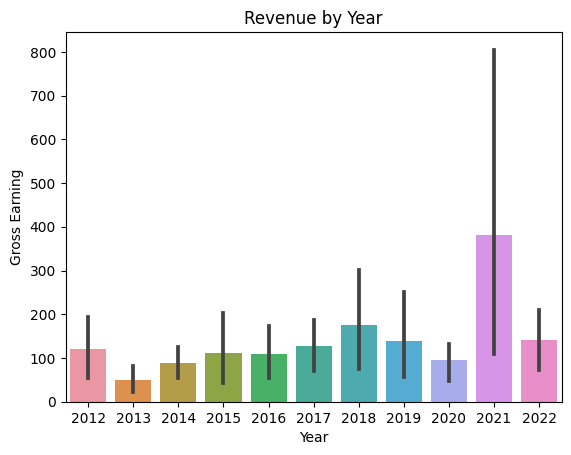

In [ ]:
x=cleaned_data[((cleaned_data['Year'] >= 2012) & (cleaned_data['Year'] <= 2022))]
sns.barplot(x='Year',y='Gross Earning',data =x)
plt.title("Revenue by Year")

# Which movie has the highest Revenue?

In [ ]:
title=cleaned_data[cleaned_data["Gross Earning"]==cleaned_data["Gross Earning"].max()]['Title']
print(title)

Rank
616    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object


# What is the average rating for each director?

In [ ]:
directors=cleaned_data.groupby("Director")["IMDB Rating"].mean().reset_index()
directors.sort_values("IMDB Rating", ascending=False)

,Director,IMDB Rating
139,Frank Darabont,8.95
480,T.J. Gnanavel,8.90
301,Madhavan,8.90
189,Irvin Kershner,8.70
284,Lana Wachowski,8.70
...,...,...
104,David Mackenzie,7.60
256,Jonathan Lynn,7.60
255,Jonathan Levine,7.60
108,David Zucker,7.60


# what are the top 10 highest runtime movies?

In [ ]:
top_10_runtime=cleaned_data.nlargest(10,'Runtime')[['Title','Runtime']].set_index('Title')
top_10_runtime

,Runtime
Title,
Gangs of Wasseypur,321
Zack Snyder's Justice League,242
Hamlet,242
Gone with the Wind,238
Once Upon a Time in America,229
Lagaan: Once Upon a Time in India,224
The Ten Commandments,220
Lawrence of Arabia,218
Ben-Hur,212


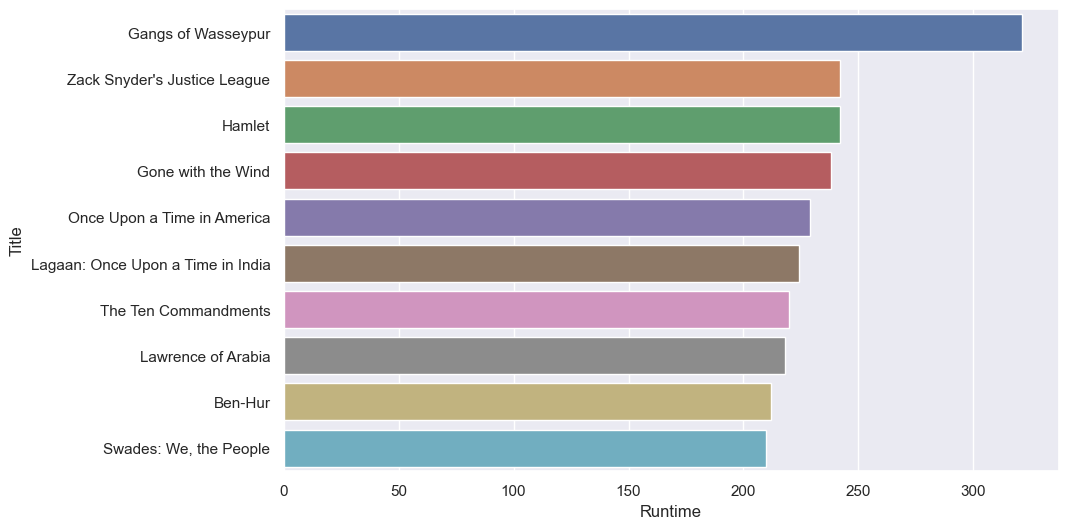

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Runtime',y=top_10_runtime.index,data=top_10_runtime,ax=ax);

# Display number of movies per years

In [ ]:
cleaned_data['Year'].value_counts()

2014    32
2004    31
2016    29
2013    27
2001    26
        ..
1936     1
1921     1
1922     1
1943     1
1924     1
Name: Year, Length: 101, dtype: int64

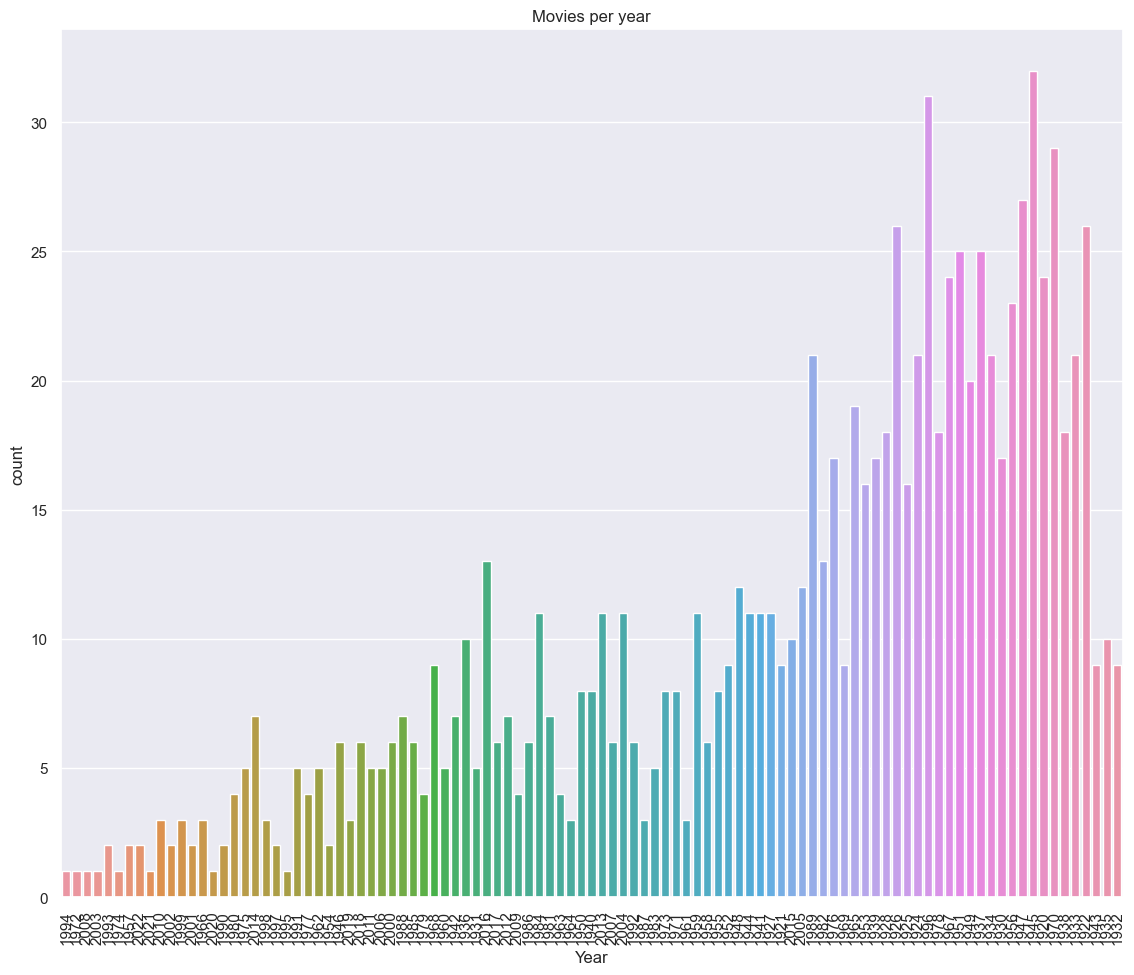

In [ ]:

plot=sns.countplot(x='Year',data=cleaned_data);
list =cleaned_data['Year'].unique()
plot.set_xticklabels(labels=list, rotation=90);
plt.title("Movies per year");

# What are the top ten highest rated movie ?

In [ ]:
top_10_rating=cleaned_data.nlargest(10,'IMDB Rating')[['Title','IMDB Rating','Director']].set_index('Title')
top_10_rating

,IMDB Rating,Director
Title,,
The Shawshank Redemption,9.3,Frank Darabont
The Godfather,9.2,Francis Ford Coppola
The Dark Knight,9.0,Christopher Nolan
The Lord of the Rings: The Return of the King,9.0,Peter Jackson
Schindler's List,9.0,Steven Spielberg
The Godfather Part II,9.0,Francis Ford Coppola
12 Angry Men,9.0,Sidney Lumet
Rocketry: The Nambi Effect,8.9,Madhavan
Jai Bhim,8.9,T.J. Gnanavel


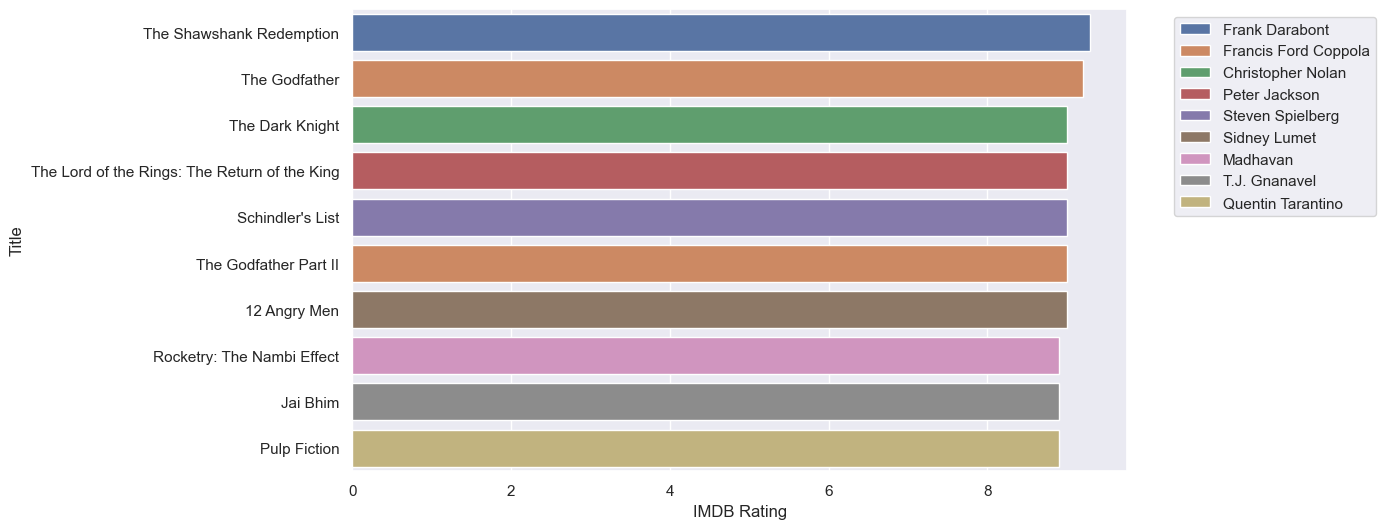

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='IMDB Rating',y=top_10_rating.index,data=top_10_rating,hue='Director',dodge=False,ax=ax);
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

# Hypothesis

# 1.Hypothesis 1= Rating does not affect revenue?

In [ ]:
cleaned_data['IMDB Rating'].corr(cleaned_data['Gross Earning'])

0.12663010876438396

Clearly the non zero value of correlation shows that rating affects the revenue.

Text(0.5, 0, 'Rating')

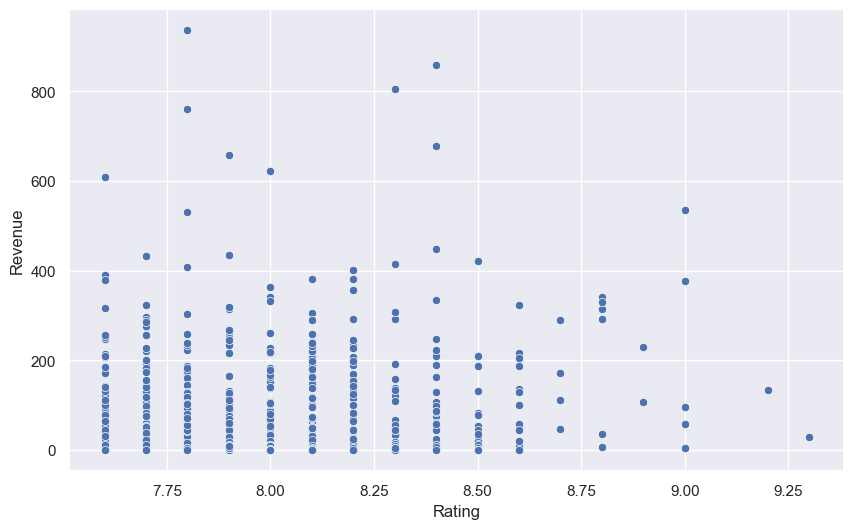

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='IMDB Rating',y='Gross Earning',data=cleaned_data,ax=ax)
#plt.scatter(cleaned_data['IMDB Rating'],cleaned_data['Gross Earning']);
plt.ylabel("Revenue")
plt.xlabel("Rating")

Clearly our null hypothesis is wrong. Rating affects the revenue.

# Hypothesis 2 =Rating is not affected by runtime.

In [ ]:
cleaned_data['IMDB Rating'].corr(cleaned_data['Runtime'])

0.26835824134436026

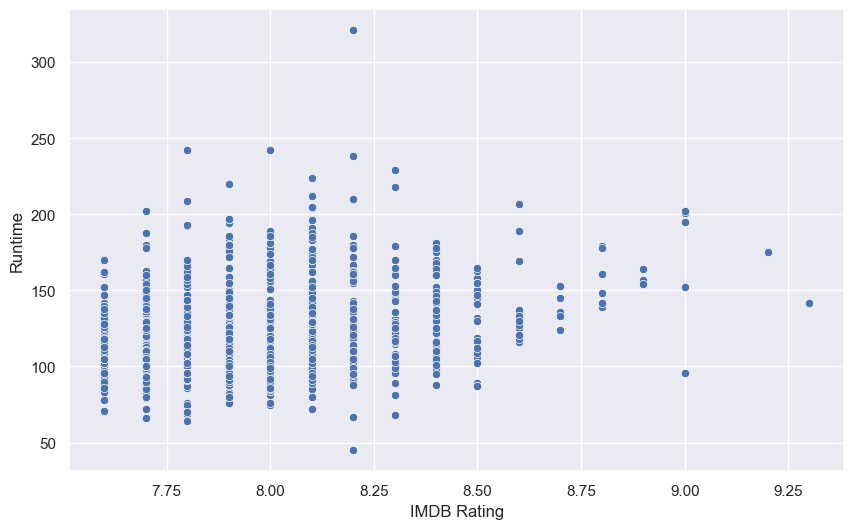

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='IMDB Rating',y='Runtime',data= cleaned_data, ax=ax)
plt.show()

Rating Increases with longer duration

# Shape

C:\Users\gorav sen\AppData\Local\Temp\ipykernel_15452\2464340790.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Metadata'], kde=False,ax=ax);


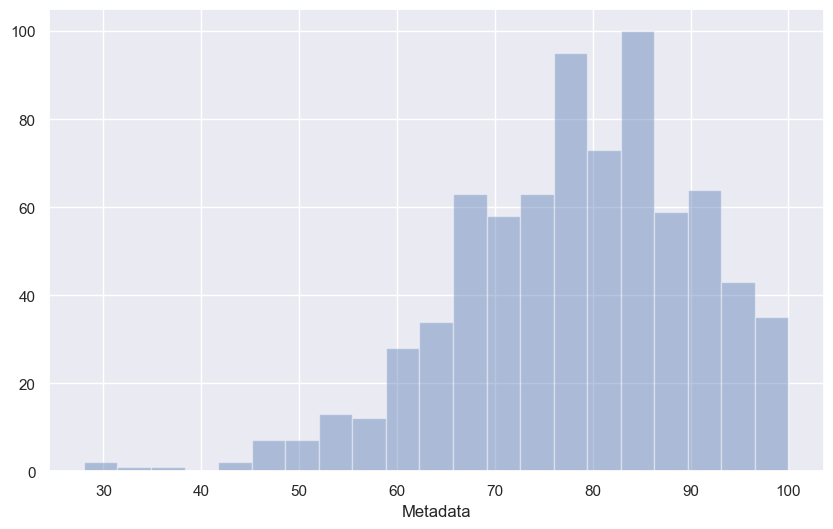

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df['Metadata'], kde=False,ax=ax);

C:\Users\gorav sen\AppData\Local\Temp\ipykernel_15452\1728577953.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Runtime'], kde=False,ax=ax);


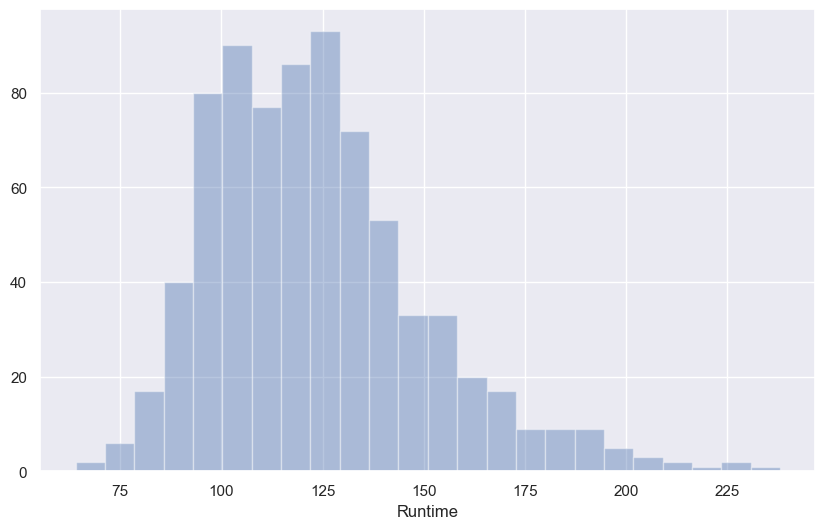

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df['Runtime'], kde=False,ax=ax);

C:\Users\gorav sen\AppData\Local\Temp\ipykernel_15452\1513932474.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Vote'], kde=False,ax=ax);


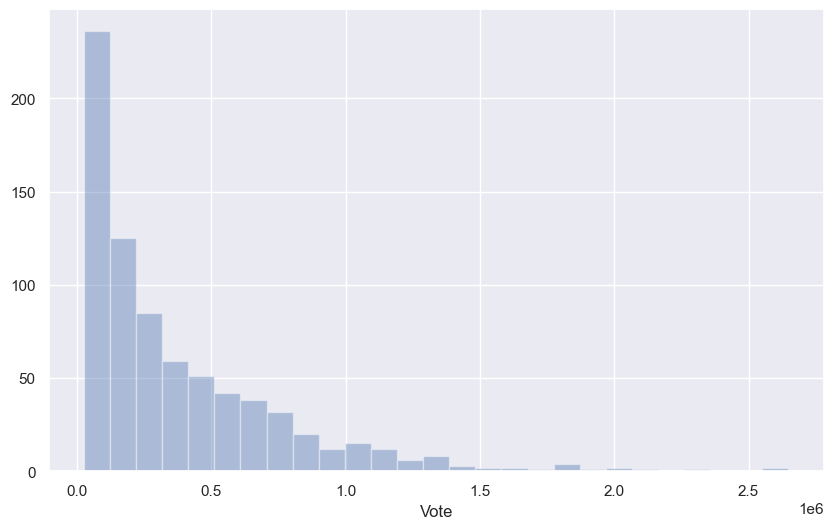

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df['Vote'], kde=False,ax=ax);

C:\Users\gorav sen\AppData\Local\Temp\ipykernel_15452\3329753649.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Gross Earning'], kde=False,ax=ax);


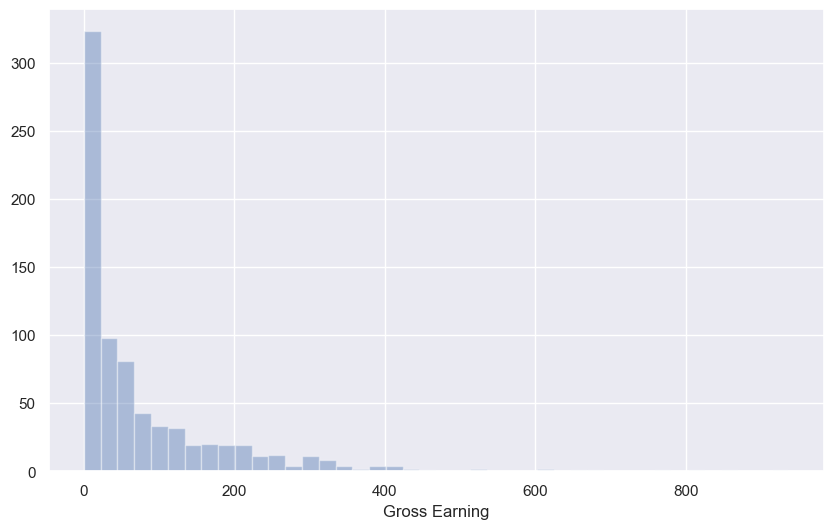

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df['Gross Earning'], kde=False,ax=ax);

# Central tendency

## Mean

In [ ]:
cleaned_data.mean()

C:\Users\gorav sen\AppData\Local\Temp\ipykernel_15452\274599841.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleaned_data.mean()


Year               1991.305000
IMDB Rating           7.965200
Runtime             123.828000
Metadata             78.761621
Gross Earning        73.097804
Vote             305710.057000
dtype: float64

## Median

In [ ]:
cleaned_data.median()

C:\Users\gorav sen\AppData\Local\Temp\ipykernel_15452\400132010.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleaned_data.median()


Year               1999.00
IMDB Rating           7.90
Runtime             120.00
Metadata             80.00
Gross Earning        26.02
Vote             152667.00
dtype: float64

# Variability
* range
* IQR
* Variance and Standard deviation

# Range

In [ ]:
min_val = cleaned_data['IMDB Rating'].min()
max_val = cleaned_data['IMDB Rating'].max()
range_vals =  max_val - min_val
print(max_val, '-' , min_val,' = ',  range_vals)

9.3 - 7.6  =  1.700000000000001


In [ ]:
min_val = cleaned_data['Metadata'].min()
max_val = cleaned_data['Metadata'].max()
range_vals =  max_val - min_val
print(max_val, '-' , min_val,' = ',  range_vals)

100.0 - 28.0  =  72.0


In [ ]:
min_val = cleaned_data['Runtime'].min()
max_val = cleaned_data['Runtime'].max()
range_vals =  max_val - min_val
print(max_val, '-' , min_val,' = ',  range_vals)

321 - 45  =  276


In [ ]:
min_val = cleaned_data['Gross Earning'].min()
max_val = cleaned_data['Gross Earning'].max()
range_vals =  max_val - min_val
print(max_val, '-' , min_val,' = ',  range_vals)

936.66 - 0.0  =  936.66


In [ ]:
min_val = cleaned_data['Vote'].min()
max_val = cleaned_data['Vote'].max()
range_vals =  max_val - min_val
print(max_val, '-' , min_val,' = ',  range_vals)

2648769 - 25501  =  2623268


# IQR(Interquartile Range)
75th percentile - 25th percentile

In [ ]:
lower, upper = np.percentile(cleaned_data['IMDB Rating'], [25, 75])
iqr = upper - lower
iqr

0.39999999999999947

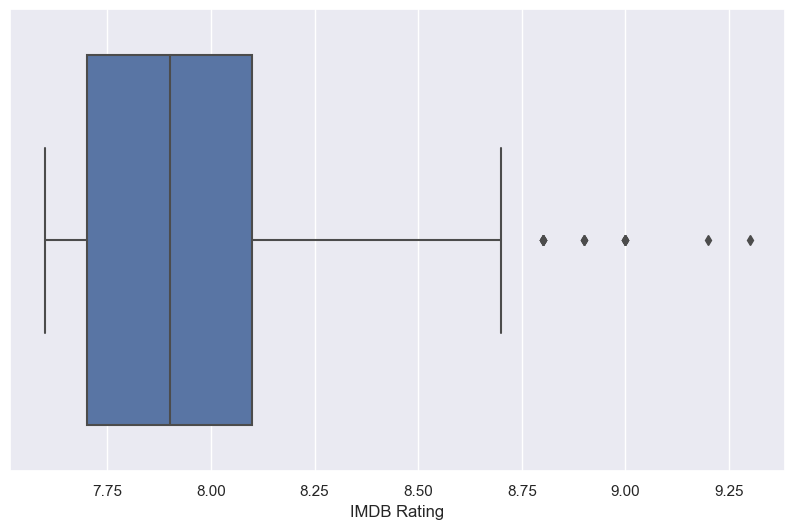

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='IMDB Rating', data=cleaned_data,ax=ax);

In [ ]:
lower, upper = np.percentile(cleaned_data['Runtime'], [25, 75])
iqr = upper - lower
iqr

35.0

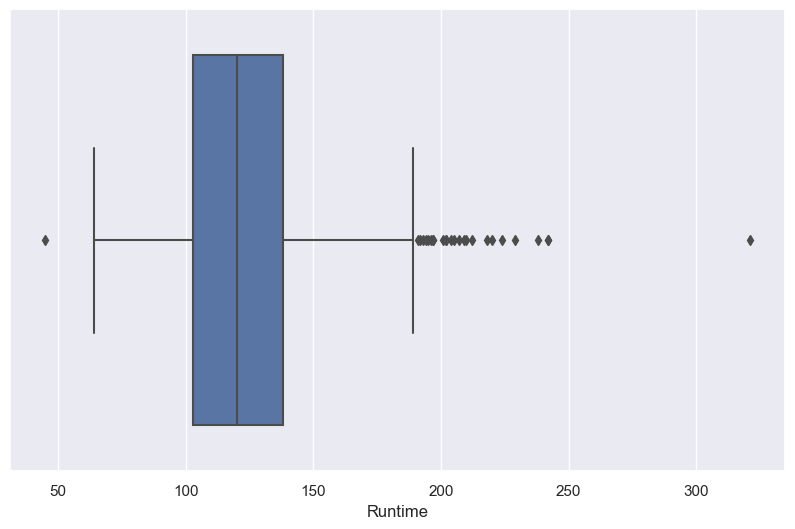

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Runtime', data=cleaned_data,ax=ax);

In [ ]:
df=cleaned_data.dropna(axis=0)
lower, upper = np.percentile(df['Metadata'], [25, 75])
iqr = upper - lower
iqr

16.0

In [ ]:
df=cleaned_data.dropna(axis=0)
lower, upper = np.percentile(df['Gross Earning'], [25, 75])
iqr = upper - lower
iqr

102.40750000000001

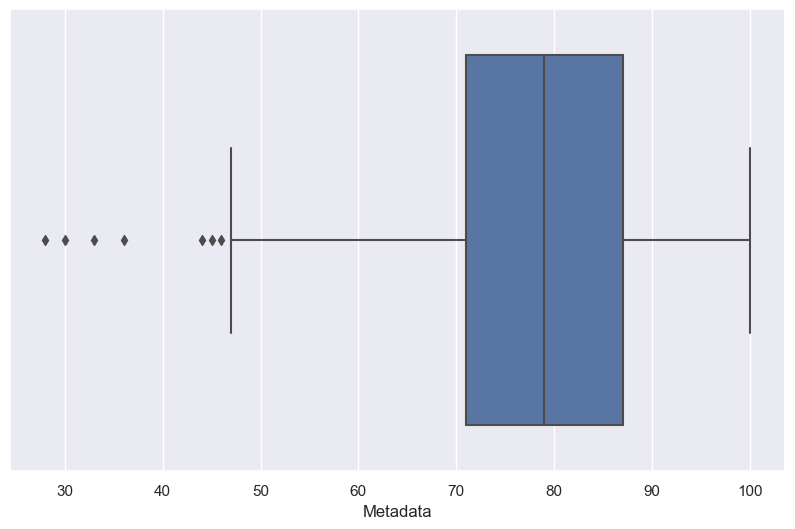

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Metadata', data=df,ax=ax);

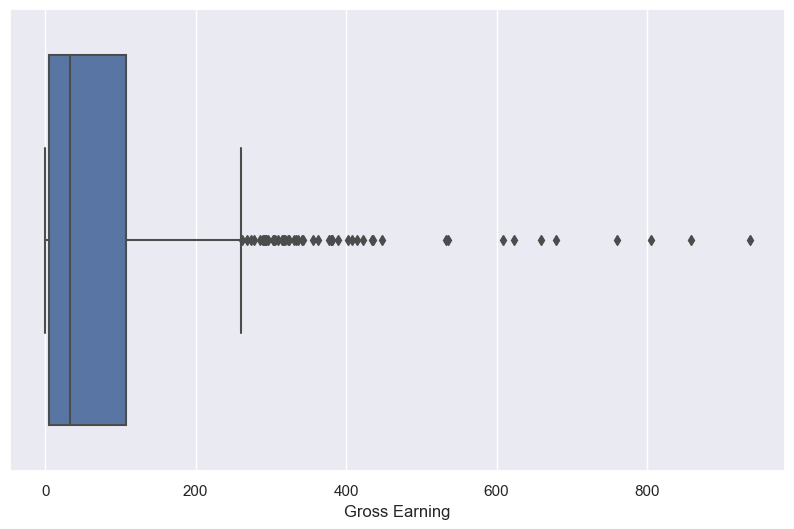

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Gross Earning', data=df,ax=ax);

# Variance and Standard Deviation

### Variance

In [ ]:
cleaned_data['Runtime'].var()

821.3958118118118

In [ ]:
cleaned_data['IMDB Rating'].var()

0.07686582582582582

In [ ]:
cleaned_data['Gross Earning'].var()

12924.594112902441

In [ ]:
cleaned_data['Metadata'].var()

144.355995459989

In [ ]:
cleaned_data['Vote'].var()

135246135059.39915

### Standard deviation

In [ ]:
cleaned_data['Runtime'].std()

28.660003695251188

In [ ]:
cleaned_data['Vote'].std()

367758.25627631956

In [ ]:
cleaned_data['Metadata'].std()

12.014823987890502

In [ ]:
cleaned_data['Gross Earning'].std()

113.6863849055921

In [ ]:
cleaned_data['IMDB Rating'].std()

0.27724686801806403